In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# converting total charges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Checking its datatype
df['TotalCharges'].dtypes

dtype('float64')

In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
# drop missing values along the rows
df.dropna(axis=0, inplace=True)

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [9]:
# since total charges is highly correlated with tenure and monthly charges, we can safely drop it to avoid redundant data
df.drop('TotalCharges', axis=1, inplace=True)
# drop customer id column
df.drop('customerID', axis=1, inplace=True)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


# Exploratory Data Analysis

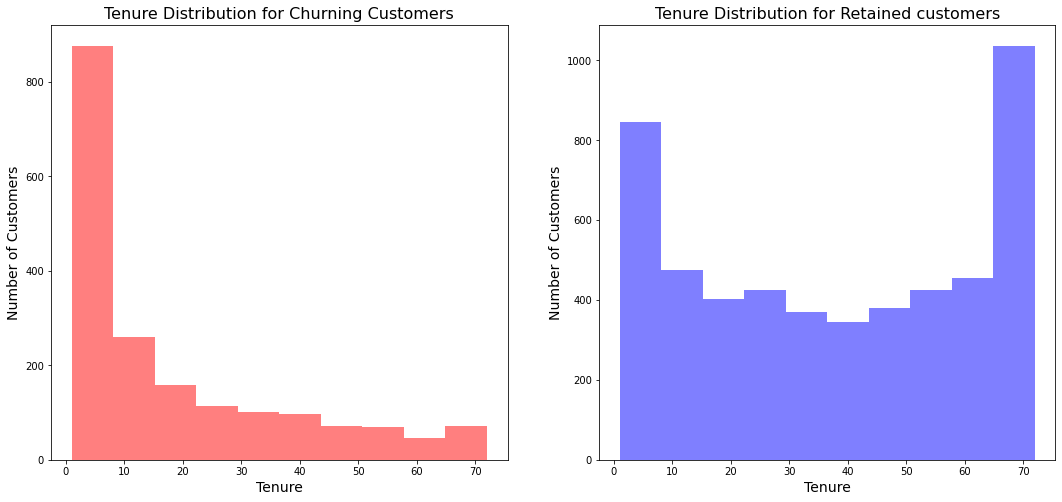

In [11]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(121)
ax2 =fig.add_subplot(122)

ax1.hist(df[df["Churn"]=='Yes']["tenure"], alpha=0.5, color="red")
ax2.hist(df[df["Churn"]=='No']["tenure"], alpha=0.5, color="blue")

ax1.set_title('Tenure Distribution for Churning Customers', fontsize=16)
ax1.set_ylabel('Number of Customers', fontsize=14)
ax1.set_xlabel('Tenure', fontsize=14)


ax2.set_title('Tenure Distribution for Retained customers', fontsize=16)
ax2.set_ylabel('Number of Customers', fontsize=14)
ax2.set_xlabel('Tenure', fontsize=14)


plt.show()

**We can present these plots more intuitively using Kernel Density Estimate Plot**

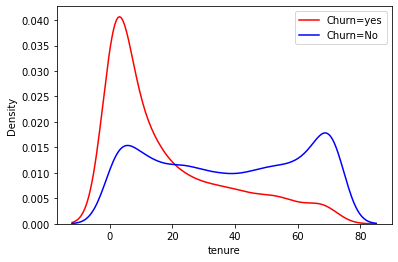

In [12]:
ax = sns.kdeplot(df[df["Churn"]=='Yes']["tenure"], color="r",label="Churn=yes")
sns.kdeplot(df[df["Churn"]=='No']["tenure"], color="b", label="Churn=No", ax=ax)
ax.legend()
plt.show()

**Churn rate appears pretty lower among customers who stayed more with the company**

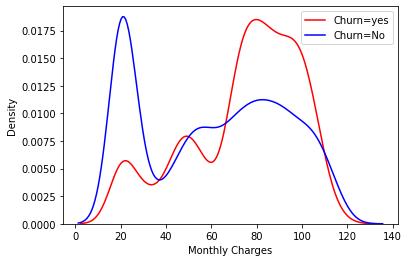

In [13]:
ax = sns.kdeplot(df[df["Churn"]=='Yes']["MonthlyCharges"],color="r", label="Churn=yes")
sns.kdeplot(df[df["Churn"]=='No']["MonthlyCharges"],color="b", label="Churn=No",ax=ax)
ax.set_xlabel('Monthly Charges')
ax.legend()
plt.show()

**with the increase in monthly charges, customers tend to churn away**

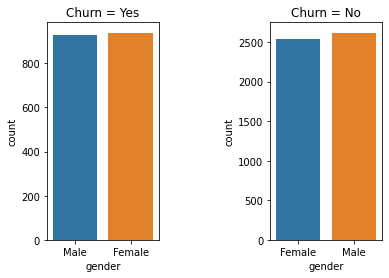

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2= fig.add_subplot(122)

fig.subplots_adjust(wspace=1)

sns.countplot(x=df[df['Churn']=='Yes']['gender'], ax=ax1)
ax1.set_title('Churn = Yes')

sns.countplot(x= df[df['Churn']=='No']['gender'], ax=ax2)
ax2.set_title('Churn = No')

plt.show()

**we can see that gender has almost no impact on churn rate**

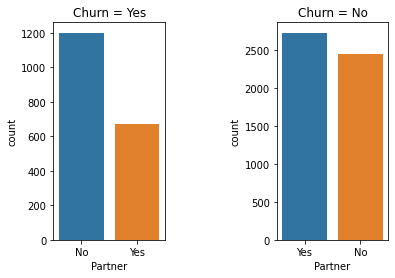

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2= fig.add_subplot(122)

fig.subplots_adjust(wspace=1)


sns.countplot(x=df[df['Churn']=='Yes']['Partner'], ax=ax1)
ax1.set_title('Churn = Yes')

sns.countplot(x=df[df['Churn']=='No']['Partner'], ax=ax2)
ax2.set_title('Churn = No')
plt.show()

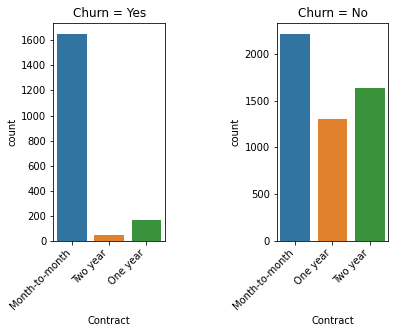

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2= fig.add_subplot(122)

fig.subplots_adjust(wspace=1)


sns.countplot(x=df[df['Churn']=='Yes']['Contract'], ax=ax1)
ax1.set_title('Churn = Yes')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')


sns.countplot(x=df[df['Churn']=='No']['Contract'], ax=ax2)
ax2.set_title('Churn = No')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')


plt.show()

**The proportion of Month-to-Month contract is distinctly high among the customers who have churned away**

In [17]:
dependents = df.groupby('Dependents').Churn.value_counts().sort_values()
dependents

Dependents  Churn
Yes         Yes       326
No          Yes      1543
Yes         No       1773
No          No       3390
Name: Churn, dtype: int64

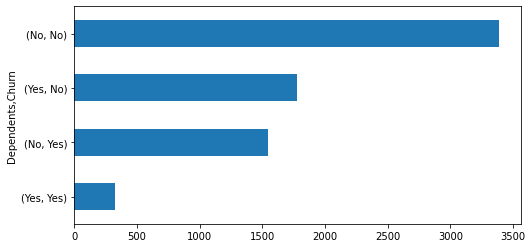

In [18]:
dependents.plot(kind='barh', figsize=(8,4))
plt.show()

**Churn rate appears to be inversely proportional to having dependents, as we can see that retention rate is the highest among those who have no dependents.**

In [19]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [20]:
df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

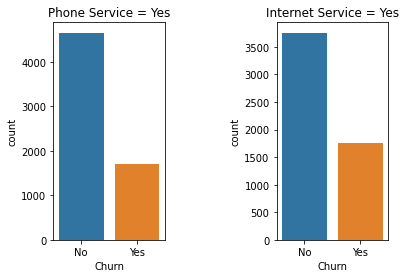

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2= fig.add_subplot(122)

fig.subplots_adjust(wspace=1)

sns.countplot(x=df[df['PhoneService']=='Yes']['Churn'], ax=ax1)
ax1.set_title('Phone Service = Yes')

sns.countplot(x=df[df['InternetService']!='No']['Churn'], ax=ax2)
ax2.set_title('Internet Service = Yes')

plt.show()

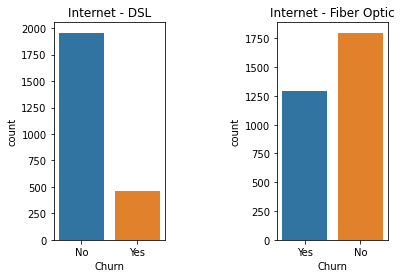

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2= fig.add_subplot(122)

fig.subplots_adjust(wspace=1)

sns.countplot(x=df[df['InternetService']=='DSL']['Churn'], ax=ax1)
ax1.set_title('Internet - DSL')

sns.countplot(x=df[df['InternetService']=='Fiber optic']['Churn'], ax=ax2)
ax2.set_title('Internet - Fiber Optic')

plt.show()

**It is clearly visible that the proportion of churning customers is higher among the users of the Fiber optic internet**


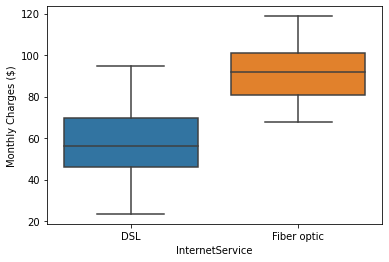

In [23]:
ax1 = sns.boxplot(x =df[df['InternetService']!='No']['InternetService'],
                  y = df[df['InternetService']!='No']['MonthlyCharges'])

ax1.set_ylabel('Monthly Charges ($)')

plt.show()

**Fiber optic charges more than DSL, which perfectly explains the high churn rate among the users of Fiber optic internet, and proves that with higher monthly charges, comes higher churn rate**

In [24]:
df.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

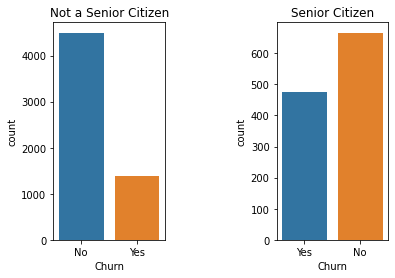

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2= fig.add_subplot(122)

fig.subplots_adjust(wspace=1)


sns.countplot(x=df[df['SeniorCitizen']==0]['Churn'], ax=ax1)
ax1.set_title('Not a Senior Citizen')

sns.countplot(x=df[df['SeniorCitizen']==1]['Churn'], ax=ax2)
ax2.set_title('Senior Citizen')
plt.show()

**there is obvious difference in churn rate in case of not seniority unlike the other scenario**

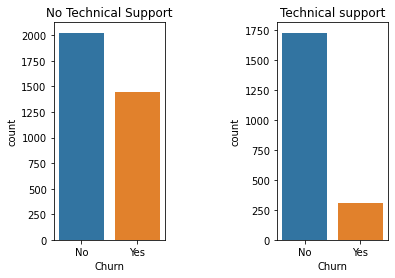

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2= fig.add_subplot(122)

fig.subplots_adjust(wspace=1)


sns.countplot(x=df[df['TechSupport']=='No']['Churn'], ax=ax1)
ax1.set_title('No Technical Support')

sns.countplot(x=df[df['TechSupport']=='Yes']['Churn'], ax=ax2)
ax2.set_title('Technical support')
plt.show()

**Churn rate is higher in case that the customer recieves no technical support.**

# Model Development

In [27]:
X = df.iloc[:, :-1]
y= df['Churn']
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40


In [28]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

In [30]:
X = pd.get_dummies(X, drop_first=True)
X

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,0,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,0,1,1,1,0,1,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,1,1,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,1


## Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [64]:
# Apply feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
with pd.option_context('mode.chained_assignment', None):
    X_train.loc[:,['MonthlyCharges', 'tenure']] = sc.fit_transform(X_train.loc[:,['MonthlyCharges', 'tenure']])
    X_test.loc[:,['MonthlyCharges', 'tenure']] = sc.transform(X_test.loc[:,['MonthlyCharges', 'tenure']])
X_train

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,0,1.628149,1.460662,0,1,1,1,0,0,1,...,0,1,0,1,0,1,1,0,0,0
3504,0,1.464856,-1.495682,1,1,1,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
6715,0,-0.862073,0.812400,0,0,0,1,0,1,1,...,0,1,0,0,0,0,1,0,1,0
2866,0,-0.821250,0.659083,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
6609,0,-1.270306,-1.490683,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,0,-1.270306,-1.530679,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3269,0,1.342386,-1.334033,1,0,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
1658,0,0.730036,1.370672,1,1,1,1,0,1,1,...,0,1,0,1,0,0,0,1,0,0
2612,0,-0.739603,0.520765,0,1,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0


## Feature selection with Recursive Feature Elimination and Cross-Validation Selection

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
log_reg = LogisticRegression()
rfe = RFECV(estimator=log_reg, cv=10)
fit_rfe = rfe.fit(X_train, y_train)
print(f'Number of features: {fit_rfe.n_features_}')
print(f'features ranking: {fit_rfe.ranking_}')

Number of features: 24
features ranking: [1 1 4 6 5 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 3]


In [34]:
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

In [35]:
# train the model on the training data set
log_reg.fit(X_train_selected, y_train)

LogisticRegression()

In [36]:
# predict classes and probabilities
yhat_log = log_reg.predict(X_test_selected)
yhat_proba_log = log_reg.predict_proba(X_test_selected)[:,1]

### Applying 10-Fold Cross Validation


In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = log_reg, X = X_train_selected, y = y_train, cv = 10)
print(f'Accuracy: {accuracies.mean()*100: .2f} %')
print(f'Standard Deviation: {accuracies.std()*100: .2f} %')

Accuracy:  80.17 %
Standard Deviation:  1.37 %


**average accuracy over 10 different test sets is 80.17 % with all the accuracies lie between 81.54 % and 78.8 %**

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat_log)

array([[1185,  126],
       [ 210,  237]], dtype=int64)

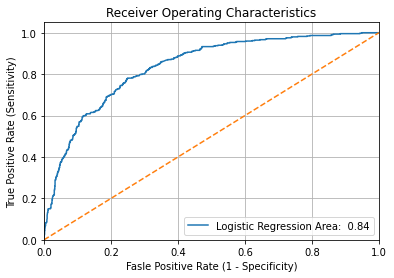

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logreg_roc_auc = roc_auc_score(y_test,yhat_proba_log)

fpr, tpr, thresholds = roc_curve(y_test, yhat_proba_log)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression Area: {logreg_roc_auc: 0.2f}')
plt.plot([0,1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristics')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [40]:
from sklearn.metrics import classification_report
log_report = classification_report(y_test, yhat_log)
print(log_report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1311
           1       0.65      0.53      0.59       447

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



# compare the performance of the logistic regression model with those of 
## 1. Decision Tree
## 2. KNN   
## 3. Support Vector Machine

# Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
DT_class = DecisionTreeClassifier()
DT_class.fit(X_train_selected, y_train)

DecisionTreeClassifier()

In [42]:
yhat_dt = DT_class.predict(X_test_selected)
yhat_proba_dt = DT_class.predict_proba(X_test_selected)[:,1]
yhat_proba_dt

array([0.2, 0. , 0. , ..., 0. , 0. , 0. ])

## Applying k-Fold Cross Validation

In [43]:
accuracies = cross_val_score(estimator = DT_class, X = X_train_selected, y = y_train, cv = 10)
print(f'Accuracy: {accuracies.mean()*100: .2f} %')
print(f'Standard Deviation: {accuracies.std()*100: .2f} %')

Accuracy:  74.06 %
Standard Deviation:  2.06 %


In [44]:
confusion_matrix(y_test, yhat_dt)

array([[1049,  262],
       [ 227,  220]], dtype=int64)

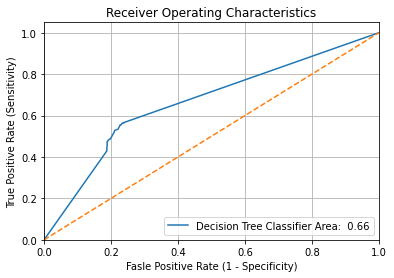

In [45]:
DT_roc_auc = roc_auc_score(y_test, yhat_proba_dt)

fpr, tpr, thresholds = roc_curve(y_test, yhat_proba_dt)
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree Classifier Area: {DT_roc_auc: 0.2f}')
plt.plot([0,1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristics')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [46]:
from sklearn.metrics import classification_report
DT_report = classification_report(y_test, yhat_dt)
print(DT_report)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1311
           1       0.46      0.49      0.47       447

    accuracy                           0.72      1758
   macro avg       0.64      0.65      0.64      1758
weighted avg       0.73      0.72      0.73      1758



# K-Nearest Neighbors Classifier


In [47]:
# Determine best k for performance
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_selected, y_train)
    yhat_knn = knn.predict(X_test_selected)
    scores.append(metrics.accuracy_score(y_test, yhat_knn))

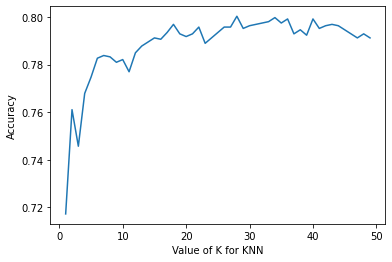

In [48]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()

**we can see that the best performance occurs with k around 35**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=35)
knn2.fit(X_train_selected, y_train)

KNeighborsClassifier(n_neighbors=35)

In [50]:
accuracies = cross_val_score(estimator = knn2, X = X_train_selected, y = y_train, cv = 10)
print(f'Accuracy: {accuracies.mean()*100: .2f} %')
print(f'Standard Deviation: {accuracies.std()*100: .2f} %')

Accuracy:  79.60 %
Standard Deviation:  1.14 %


In [51]:
yhat_knn2 = knn2.predict(X_test_selected)
yhat_proba_knn2 = knn2.predict_proba(X_test_selected)[:,1]

In [52]:
confusion_matrix(y_test, yhat_knn2)

array([[1153,  158],
       [ 198,  249]], dtype=int64)

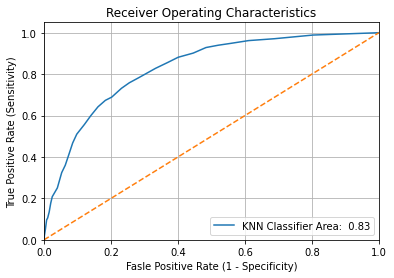

In [53]:
knn_roc_auc = roc_auc_score(y_test, yhat_proba_knn2)

fpr, tpr, thresholds = roc_curve(y_test, yhat_proba_knn2)
plt.figure()
plt.plot(fpr, tpr, label=f'KNN Classifier Area: {knn_roc_auc: 0.2f}')
plt.plot([0,1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristics')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [54]:
from sklearn.metrics import classification_report
Knn_report = classification_report(y_test, yhat_knn2)
print(Knn_report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1311
           1       0.61      0.56      0.58       447

    accuracy                           0.80      1758
   macro avg       0.73      0.72      0.72      1758
weighted avg       0.79      0.80      0.79      1758



# Kernel SVC

In [55]:
from sklearn.svm import SVC
sv = SVC(kernel='rbf', probability=True)
sv.fit(X_train_selected, y_train)

SVC(probability=True)

In [56]:
yhat_sv = sv.predict(X_test_selected)
yhat_proba_sv = sv.predict_proba(X_test_selected)[:,1]

In [57]:
accuracies = cross_val_score(estimator = sv, X = X_train_selected, y = y_train, cv = 10)
print(f'Accuracy: {accuracies.mean()*100: .2f} %')
print(f'Standard Deviation: {accuracies.std()*100: .2f} %')

Accuracy:  79.92 %
Standard Deviation:  1.21 %


In [58]:
confusion_matrix(y_test, yhat_sv)

array([[1203,  108],
       [ 228,  219]], dtype=int64)

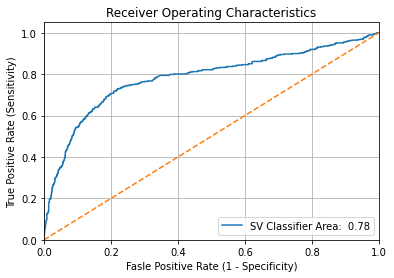

In [59]:
sv_roc_auc = roc_auc_score(y_test, yhat_proba_sv)

fpr, tpr, thresholds = roc_curve(y_test, yhat_proba_sv)
plt.figure()
plt.plot(fpr, tpr, label=f'SV Classifier Area: {sv_roc_auc: 0.2f}')
plt.plot([0,1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Fasle Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristics')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In [60]:
from sklearn.metrics import classification_report
sv_report = classification_report(y_test, yhat_sv)
print(sv_report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1311
           1       0.67      0.49      0.57       447

    accuracy                           0.81      1758
   macro avg       0.76      0.70      0.72      1758
weighted avg       0.80      0.81      0.80      1758



# Decision Making: Determining a Good Model Fit

In [66]:
model = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Support Vector Machine']
accuracy = [80.17, 73.82, 79.60, 79.92]
sensitivity = [53, 46, 56, 49]
specifity = [90 , 80, 88, 92]
summary = pd.DataFrame({'Model': model,
                        'Accuracy %' : accuracy,
                       'Sensitivity %': sensitivity,
                      'Specificity %': specifity
                       })
summary

,Model,Accuracy %,Sensitivity %,Specificity %
0,Logistic Regression,80.17,53,90
1,Decision Tree,73.82,46,80
2,K-Nearest Neighbors,79.60,56,88
3,Support Vector Machine,79.92,49,92


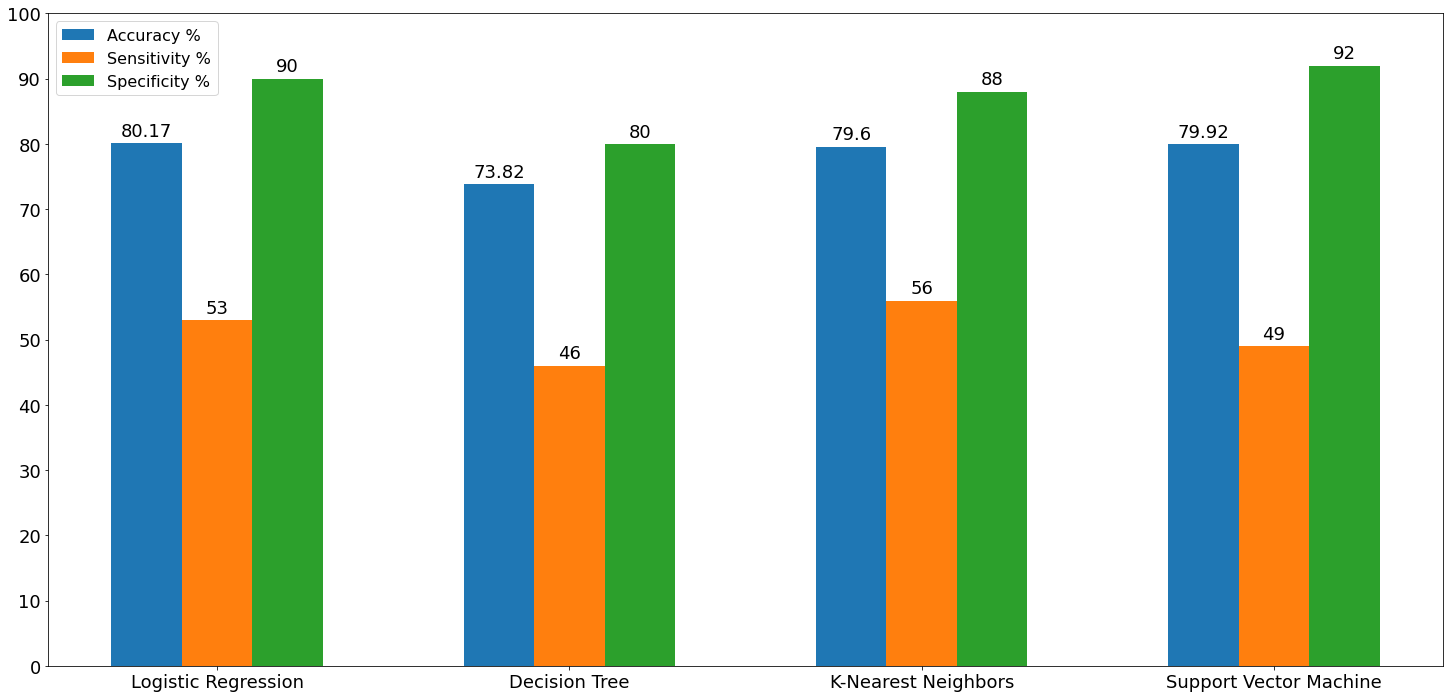

In [69]:
w = 0.2
acc_bar = np.arange(len(model))
sen_bar = list((i+w for i in acc_bar))
spe_bar = list((i+2*w for i in acc_bar))

fig = plt.figure(figsize=(25,12))

bar1 = plt.bar(acc_bar, accuracy, width=w, label='Accuracy %')
bar2 = plt.bar(sen_bar, sensitivity, width=w, label='Sensitivity %')
bar3 = plt.bar(spe_bar, specifity, width=w, label='Specificity %')

plt.xticks(acc_bar+w, model,fontsize=18)
plt.yticks(np.arange(0, 110, 10),fontsize=18)
plt.legend(fontsize=16)


def autolabel(bar):
    """Attach a text label above each bar in *bar*, displaying its height."""
    for i in bar:
        height = i.get_height()
        plt.annotate(i.get_height(),
                    xy=(i.get_x() + i.get_width() / 2, height),
                     xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points",
                     ha='center', va='bottom', fontsize=18)


autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.show()